# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

### Espacios complejos para separar

In [3]:
import matplotlib.pyplot as plt
import time
from sklearn import datasets, manifold
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

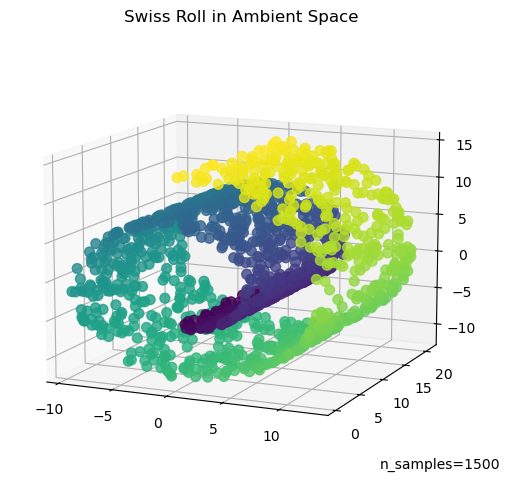

In [2]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

### Implenetación de t-SNE

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time

In [4]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Esto es un DataFrame de Pandas
y_train = mnist.target  # Esto es una Serie de Pandas

In [5]:
X.shape

(70000, 784)

In [6]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

![Mi Imagen](mnist_digit_5.png)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #Esto devuelve un array NumPy

In [8]:
# Tomar una muestra de 3000 puntos
np.random.seed(0)  
indices = np.random.choice(X_scaled.shape[0], 3000, replace=False)
x_sample = X_scaled[indices]
y_sample = y_train.iloc[indices]  #.iloc para indexar correctamente un DataFrame/Serie

In [9]:
y_sample = y_sample.astype(int)

In [10]:
# t-SNE
tsne = TSNE(n_components=2, random_state=0) #perplexity=perp, n_iter=3000 
#Perplexicity controla la cantidad de vecinos, valores elevados demasiado divididos
x_tsne = tsne.fit_transform(x_sample)

In [10]:
def plotting(X_scaled, labels,  title = 'Gráfico 3D', xlabel = 'Componente 1', ylabel='Componente 2'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=5, alpha=0.6)
    legend_labels = [str(i) for i in range(len(labels.value_counts()))]  # Etiquetas de los dígitos (0-9)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i), markersize=10) for i in range(10)]
    plt.legend(handles, legend_labels, title='Digit Label', loc='upper right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

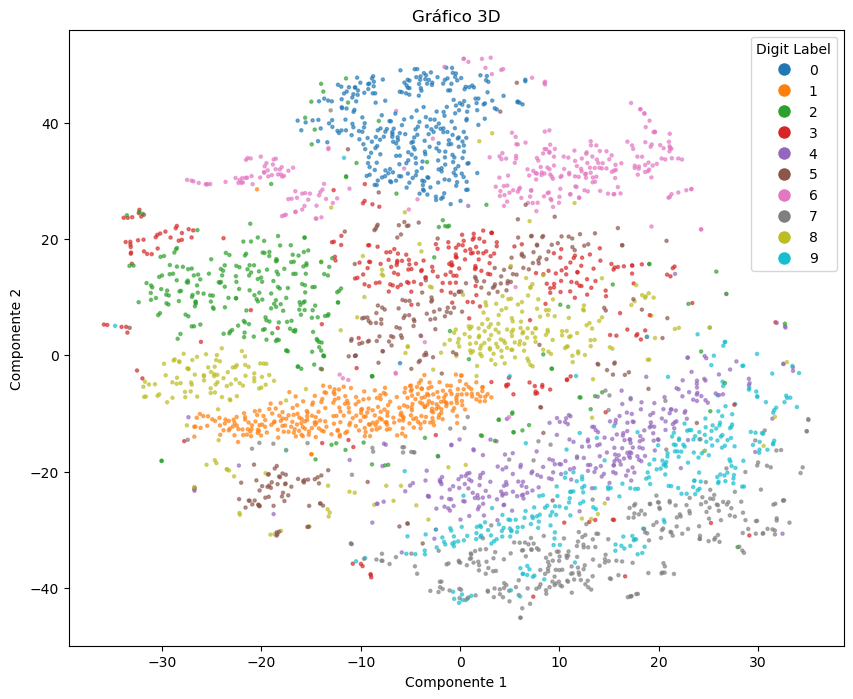

In [21]:
plotting(x_tsne, y_sample)

In [22]:
# t-SNE
import time
start_time = time.time()
tsne = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=3000 )
#Perplexicity controla la cantidad de vecinos, valores elevados demasiado divididos
x_tsne = tsne.fit_transform(x_sample)
total_time = time.time() - start_time
print(f'El tSNE tomó: {total_time :.2f} segundos')

#Plotting
plotting(x_tsne, y_sample)

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


KeyboardInterrupt: 

### UMAP

In [ ]:
#!pip install umap.learn

In [1]:
import time
import umap
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Esto es un DataFrame de Pandas
y_train = mnist.target  # Esto es una Serie de Pandas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #Esto devuelve un array NumPy

In [6]:
# Tomar una muestra de 3000 puntos
np.random.seed(0)  
indices = np.random.choice(X_scaled.shape[0], 3000, replace=False)
x_sample = X_scaled[indices]
y_sample = y_train.iloc[indices]  #.iloc para indexar correctamente un DataFrame/Serie
y_sample = y_sample.astype(int)

In [7]:
# Aplicar UMAP y medimos el tiempo
start_time = time.time()
umap_m = umap.UMAP(n_components=2, random_state=0)
x_umap = umap_m.fit_transform(x_sample)
total_time = time.time() - start_time

print(f'El UMAP tomó: {total_time :.2f} segundos')

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


El UMAP tomó: 90.94 segundos


In [8]:
y_sample.head()

10840    0
56267    4
14849    1
62726    2
47180    7
Name: class, dtype: int64

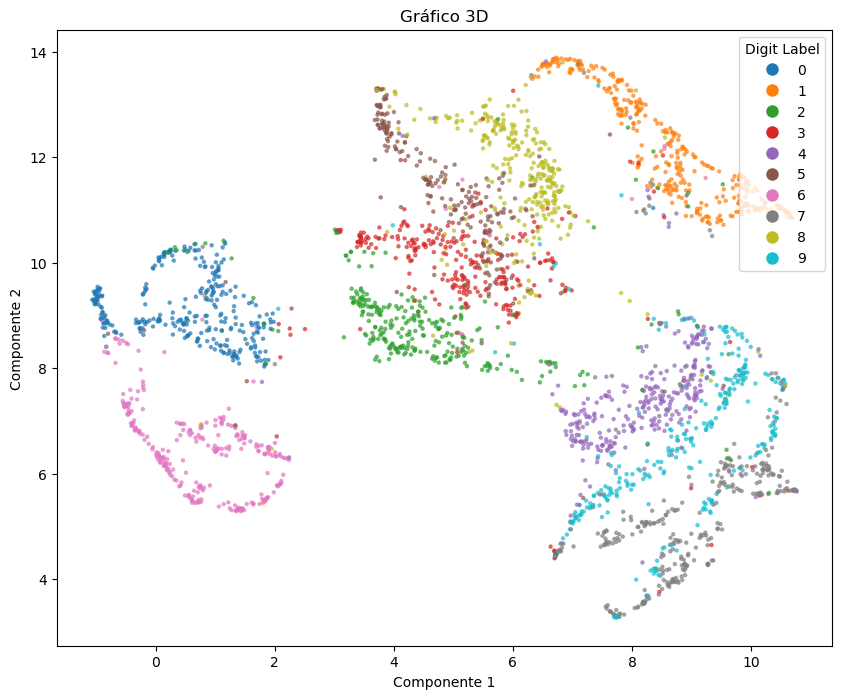

In [11]:
plotting(x_umap, y_sample)

### Volvamos a la rueda

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
import pandas as pd
import numpy as np

In [13]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

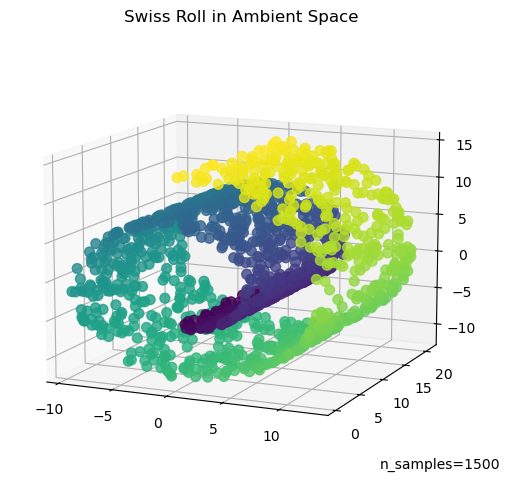

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [15]:
sr_points = pd.DataFrame(sr_points, columns=['x', 'y', 'z'])
labels = pd.cut(sr_color, 3, labels=[0,1,2])

In [16]:
scaler = MinMaxScaler()
sr_points_caled = scaler.fit_transform(sr_points)

# Aplicamos t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
data_tsne = tsne.fit_transform(sr_points_caled)

# Aplicamos UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
data_umap = umap_model.fit_transform(sr_points_caled)

C:\Users\renzo\miniconda3\envs\base_ds_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


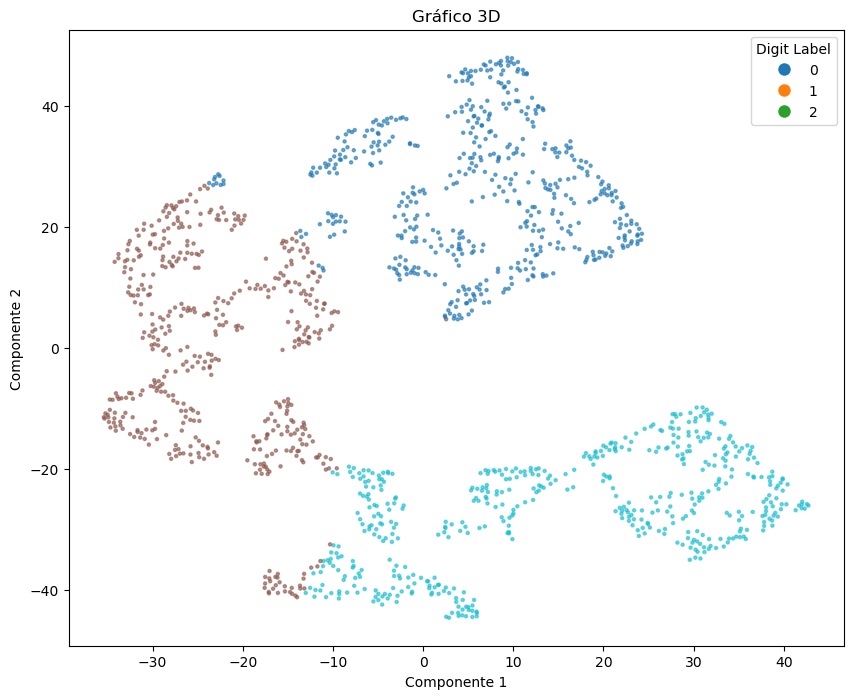

In [17]:
plotting(data_tsne, labels)

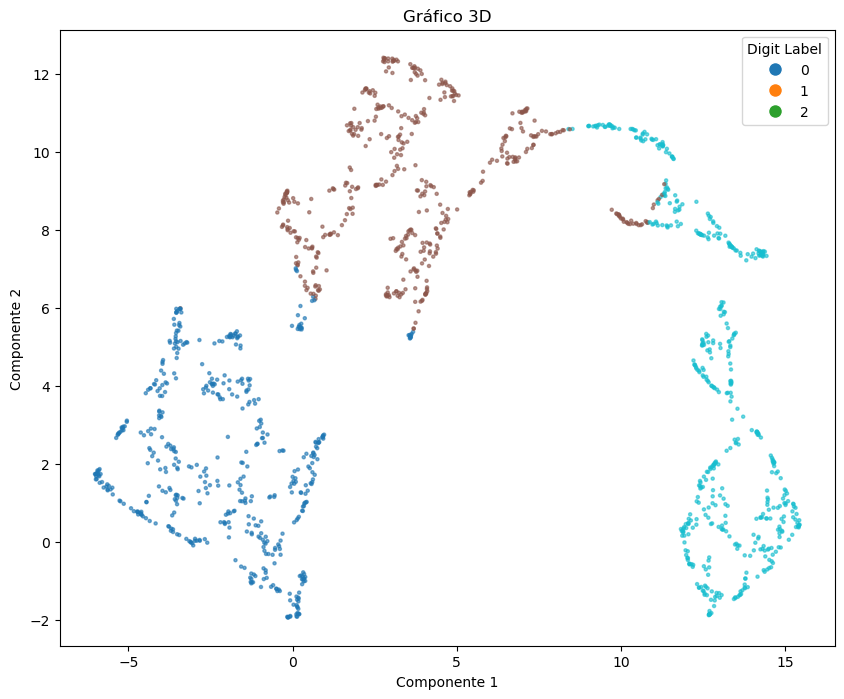

In [19]:
plotting(data_umap, labels)